In [1]:
from gala.units import UnitSystem
from astropy import units as u
usys = UnitSystem(u.kpc, u.Myr, u.Msun, u.radian)
import jax.numpy as jnp
from astropy.coordinates import SkyCoord, Galactocentric


import matplotlib.pyplot as plt
import jax
jax.config.update("jax_enable_x64", True)
from functools import partial

from streamsculptor import potential

import numpy as np




Here we demonstrate how batches of orbits can be computed. Under the hood, we are using scan and vmap functionallity from Jax to allow for maximum speedup of computations on cpu [scan] and gpu [vmap].

In [2]:
pot = potential.GalaMilkyWayPotential(units=usys)

In [3]:
np.random.seed(42)  
N = 100
x0s = np.random.normal(loc=0,scale=0.2,size=(N,3))
v0s = np.random.normal(loc=0,scale=0.05,size=(N,3))
x0, v0 = jnp.array([20,20.0,20]), jnp.array([.1,.05,.08])
w0_arr = jnp.hstack([x0 + x0s,v0 + v0s])
## Save these times of the trajectories for all N particles
ts = jnp.linspace(0,2000,500)


In [4]:
## Integrate the bath of orbits on cpu using scan
orbits = pot.integrate_orbit_batch_scan(w0=w0_arr,ts=ts)


Text(0, 0.5, 'z [kpc]')

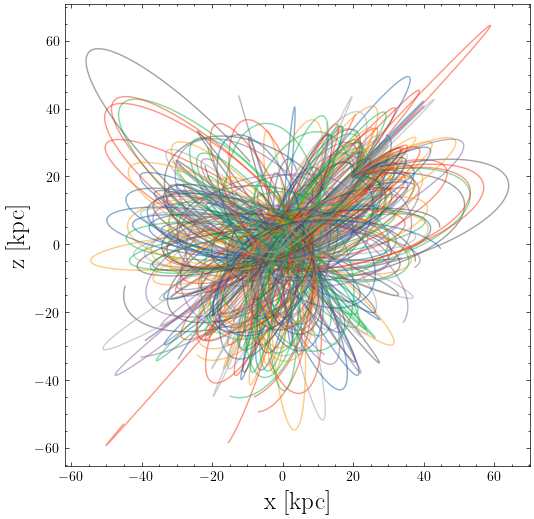

In [77]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for i in range(N):
    ax.plot(orbits.ys[i,:,0],orbits.ys[i,:,2],alpha=0.5)

ax.set_xlabel('x [kpc]',fontsize=18)
ax.set_ylabel('z [kpc]',fontsize=18)

In [6]:
## Integrate the bath of orbits on gpu using vmap
orbits_vmap = pot.integrate_orbit_batch_vmapped(w0=w0_arr,ts=ts)


Text(0, 0.5, 'z [kpc]')

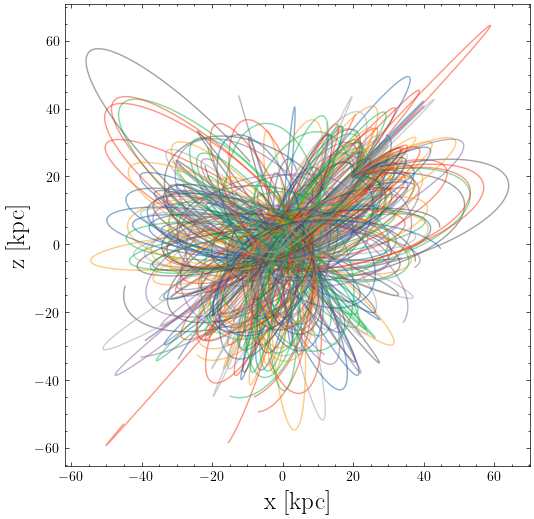

In [79]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for i in range(N):
    ax.plot(orbits.ys[i,:,0],orbits.ys[i,:,2],alpha=0.5)
ax.set_xlabel('x [kpc]',fontsize=18)
ax.set_ylabel('z [kpc]',fontsize=18)

We may also have different start and stop times for each particle.
Here we specifty the minimum and maximum time for a batch of 3 orbit integrations

In [8]:
ts_min = jnp.array([10.0,2000.,3000.])
ts_max = jnp.array([100.0,3000.,8000.])
## The save times for the trajectories of the particles are different, but they must have the same length 
ts = jnp.linspace(ts_min,ts_max,500).T
w0s = w0_arr[:3,:]
orbits = pot.integrate_orbit_batch_scan(w0=w0s,ts=ts)


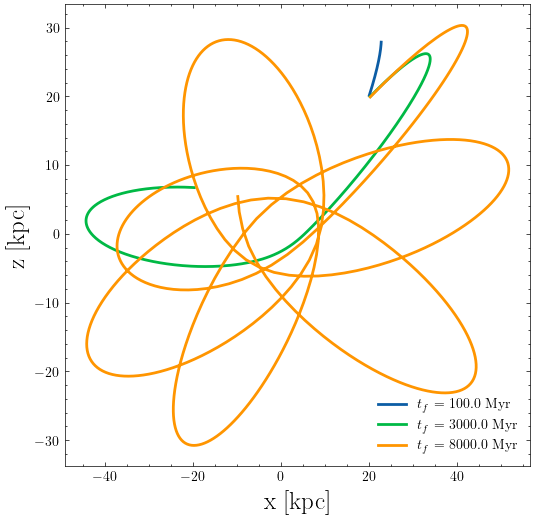

In [83]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for i in range(3):
    ax.plot(orbits.ys[i,:,0],orbits.ys[i,:,2],alpha=1,lw=2,label=r'$t_f$ = {}'.format(ts_max[i]) +' Myr',)
ax.set_xlabel('x [kpc]',fontsize=18)
ax.set_ylabel('z [kpc]',fontsize=18)
ax.legend()
